In [ ]:
"""mnist 분류"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

In [2]:
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000016679666C08>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000016678E576C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000166796667C8>)

In [6]:
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10]) #<- 0~9까지 어떤 숫자가 나와야하기 때문에

In [7]:
w = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))

In [8]:
hf = tf.nn.softmax(tf.matmul(x,w)+b)

In [9]:
cost =  tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf),axis=1))

In [10]:
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [11]:
isCorrect=tf.equal(tf.argmax(hf,1),tf.argmax(y,1))                  #<- axis를 1로 준 의미

In [12]:
accuracy=tf.reduce_mean(tf.cast(isCorrect,tf.float32)) #<- 평균적으로 맞는 갯수 즉 정확도

In [13]:
numEpochs=15
batch_size=100
numIter=int(mnist.train.num_examples/batch_size)
# 60000/100 = 600 한번에 100번씩 600번 batch를 하면 1epochs가 됨

에폭::0001, cost:2.958377143
에폭::0002, cost:1.099916194
에폭::0003, cost:0.871028329
에폭::0004, cost:0.762049690
에폭::0005, cost:0.695359719
에폭::0006, cost:0.648189247
에폭::0007, cost:0.612953326
에폭::0008, cost:0.584190717
에폭::0009, cost:nan
에폭::0010, cost:nan
에폭::0011, cost:nan
에폭::0012, cost:nan
에폭::0013, cost:nan
에폭::0014, cost:nan
에폭::0015, cost:nan
정확도: 0.098
레이블: [7]
예측: [0]


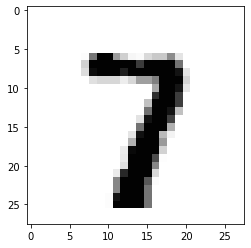

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #트레이닝
    for epoch in range(numEpochs): # 15 에폭
        avgCv=0       #<- 평균을 넣을 변수
        for i in range(numIter): # 600
            batchX,batchY=mnist.train.next_batch(batch_size)
            _,cv=sess.run([train,cost],feed_dict={x:batchX,y:batchY})
            avgCv+=cv/numIter
        print("에폭::{:04d}, cost:{:.9f}". #<- 소수점 아래 9자리까지
                 format(epoch+1,avgCv )) #<- 4자리수로 채워넣는데 빈자리는 0으로 채워라
    print("정확도:", accuracy.eval(session=sess,
                               feed_dict={x:mnist.test.images,
                                                      y:mnist.test.labels})) #<-학습이 다 끝났기 때문에 for 밖에서 정확도 출력
    r=random.randint(0,mnist.test.num_examples-1)
     #<- random한 r이 하나 나옴
    print("레이블:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1))) 
    print("예측:",sess.run(tf.argmax(hf,1),
                         feed_dict={x:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
              cmap='Greys')
    plt.show()

In [30]:
#학습모델 저장/불러오기(keras)

In [31]:
#다층퍼셉트론모델
#훈련셋,검증셋 등

In [14]:
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense,Activation
import numpy as np

Using TensorFlow backend.


In [15]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [34]:
#전처리
xTrain=xTrain.reshape(60000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [35]:
yTrain=np_utils.to_categorical(yTrain) #<- yTrain이 원핫인코딩이 됨
yTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [36]:
yTest=np_utils.to_categorical(yTest) #<- yTest이 원핫인코딩이 됨
yTest

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
xVal=xTrain[42000:]
xTrain=xTrain[:42000]
yVal=yTrain[42000:]
yTrain=yTrain[:42000]

In [16]:
#model 구성
model = Sequential()
model.add(Dense(units = 64,input_dim=28*28,activation="relu"))
model.add(Dense(units=10,activation='softmax'))#<- 이전 계층이 64개이니까 여기선 안해도 됨 알아서 맞춰줌

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [39]:
#학습 환경 설정(compile)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',metrics=['accuracy']) #<-softmax를 썼으니 cross entropy써야
#학습(fit)
model.fit(xTrain,yTrain,epochs=5,
          batch_size=50,validation_data=(xVal,yVal)) #<-validation_data:검증데이터




Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 21us/step - loss: 1.0003 - accuracy: 0.7444 - val_loss: 0.5205 - val_accuracy: 0.8702
Epoch 2/5
42000/42000 [==============================] - 1s 20us/step - loss: 0.4540 - accuracy: 0.8807 - val_loss: 0.3925 - val_accuracy: 0.8926
Epoch 3/5
42000/42000 [==============================] - 1s 21us/step - loss: 0.3754 - accuracy: 0.8965 - val_loss: 0.3477 - val_accuracy: 0.9027
Epoch 4/5
42000/42000 [==============================] - 1s 20us/step - loss: 0.3393 - accuracy: 0.9045 - val_loss: 0.3233 - val_accuracy: 0.9099
Epoch 5/5
42000/42000 [==============================] - 1s 20us/step - loss: 0.3167 - accuracy: 0.9106 - val_loss: 0.3074 - val_accuracy: 0.9123


In [40]:
#모델평가(test data)
metrics=model.evaluate(xTest,yTest,batch_size=10)
print("평가결과:"+str(metrics))

10000/10000 [==============================] - 0s 24us/step
평가결과:[0.29588541504135357, 0.9161999821662903]


In [41]:
idx = np.random.choice(xTest.shape[0],5)
xhat = xTest[idx]
yhat = model.predict_classes(xhat)

In [42]:
print("예측값:",yhat) 
for i in range(5):
    print("예측값:"+str(yhat[i])+"실제값:"+str(np.argmax(yTest[idx][i])))

예측값: [9 0 5 3 4]
예측값:9실제값:9
예측값:0실제값:0
예측값:5실제값:5
예측값:3실제값:3
예측값:4실제값:4


In [43]:
"""
모델: 모델 아키텍처와 모델 가중치로 구성
모델 아키텍처: 모델이 어떤 층으로 구성
모델 가중치: weight, bias

save():케라스 모델 저장 함수 (아키텍처+가중치)
파일형식: "h5"로 저장
"""

'\n모델: 모델 아키텍처와 모델 가중치로 구성\n모델 아키텍처: 모델이 어떤 층으로 구성\n모델 가중치: weight, bias\n\nsave():케라스 모델 저장 함수 (아키텍처+가중치)\n파일형식: "h5"로 저장\n'

In [44]:
model.save("mnist_model.h5")

In [45]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model,
                 show_shapes=True).create(prog='dot',format='svg'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [47]:
#실제 데이터 사용
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

xTest=xTest.reshape(10000,784).astype('float32')
yTest=np_utils.to_categorical(yTest)
idx=np.random.choice(xTest.shape[0],10)
xhat=xTest[idx]

#모델 불러오기
from keras.models import load_model
model=load_model("mnist_model.h5")  # <- model불러오는 명령어
yhat=model.predict_classes(xhat)
print("예측값:",yhat) 
for i in range(5):
    print("예측값:"+str(yhat[i])+"실제값:"+str(np.argmax(yTest[idx][i])))

예측값: [1 8 4 2 0 0 1 1 3 7]
예측값:1실제값:8
예측값:8실제값:8
예측값:4실제값:4
예측값:2실제값:2
예측값:0실제값:0


In [17]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [53]:
xdata=[]
ydata=[]
for i in range(len(xy)):
    xdata.append(xy[i][0:4])
    ydata.append(xy[i][-1])

In [36]:
xdata=xy[:,0:4]

In [37]:
ydata=xy[:,-1]

In [38]:
x=tf.placeholder(tf.float32,shape=[None,4])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([4,1]))
b=tf.Variable(tf.random_normal([1]))

In [39]:
hf=tf.matmul(x,w)+b
cost=tf.reduce_mean(tf.square(hf-y))

In [40]:
train=tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [41]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [42]:
for step in range(101):
    cv,hv,_ = sess.run([cost,hf,train],feed_dict={x:xdata,y:ydata})
    print(step,"cost:",cv,"\nPrediction",hv)

ValueError: Cannot feed value of shape (8,) for Tensor 'Placeholder_7:0', which has shape '(?, 1)'

In [48]:
def myMinMax(data):
    #print(np.min(data,axis=0)) #<-axis=1이면 행 단위로 최소값 출력됨
    bj=data-np.min(data,0)
    bm=np.max(data,0)-np.min(data,0)
    return bj/bm
xy=myMinMax(xy) #<- scaling된 데이터

In [49]:
xdata=xy[:,0:-1]
ydata=xy[:,[-1]]

In [50]:
x=tf.placeholder(tf.float32, [None,4])
y=tf.placeholder(tf.float32, [None,1])

In [63]:
hf=tf.matmul(x,w)+b

In [64]:
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf),axis=1))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [65]:
w=tf.Variable(tf.random_normal([4,1]))
b=tf.Variable(tf.random_normal([1]))

In [66]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(101):
    cv,hv,_ = sess.run([cost,hf,train],feed_dict={x:xdata,y:ydata})
    print(step,"cost:",cv,"\nPrediction",hv)

0 cost: nan 
Prediction [[-2.545855  ]
 [-2.0296874 ]
 [-1.6140262 ]
 [-1.139029  ]
 [-1.4795872 ]
 [-1.3624567 ]
 [-0.55640006]
 [-0.36392152]]
1 cost: nan 
Prediction [[-2.6308942]
 [-2.111441 ]
 [-1.682466 ]
 [-1.1924115]
 [-1.5425941]
 [-1.4232799]
 [-0.5973879]
 [-0.4038563]]
2 cost: nan 
Prediction [[-2.7124481 ]
 [-2.1898036 ]
 [-1.7480527 ]
 [-1.243549  ]
 [-1.6029704 ]
 [-1.4815594 ]
 [-0.63661385]
 [-0.44206417]]
3 cost: nan 
Prediction [[-2.790931  ]
 [-2.2651808 ]
 [-1.8111285 ]
 [-1.2927132 ]
 [-1.661032  ]
 [-1.5376017 ]
 [-0.6742947 ]
 [-0.47875828]]
4 cost: nan 
Prediction [[-2.8666778 ]
 [-2.3379014 ]
 [-1.8719714 ]
 [-1.3401237 ]
 [-1.7170355 ]
 [-1.5916545 ]
 [-0.71060514]
 [-0.51411027]]
5 cost: nan 
Prediction [[-2.9399652 ]
 [-2.4082358 ]
 [-1.9308095 ]
 [-1.3859613 ]
 [-1.7711918 ]
 [-1.6439226 ]
 [-0.7456885 ]
 [-0.54826105]]
6 cost: nan 
Prediction [[-3.0110261 ]
 [-2.4764116 ]
 [-1.9878347 ]
 [-1.4303772 ]
 [-1.8236778 ]
 [-1.6945761 ]
 [-0.77966434]
 [-0.5813

In [ ]:
#이따 연습문제 실제 종가 출력하기

In [69]:
#xor문제를 텐서플로우로 구현
#단일, 멀티 퍼셉트론 각각 구현
xdata=np.array([[0,0],
          [0,1],
         [1,0],
         [1,1]])

In [70]:
ydata=np.array([[0],
           [1],
           [1],
           [0]])
#트레이닝 횟수:10000번 , lr=0.1

In [ ]:
#classification이므로 sigmoid와 

In [71]:
w=tf.Variable(tf.random_normal([1,4]))
b=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32,[4,1])
y=tf.placeholder(tf.float32,[4,1])

In [78]:
x=tf.placeholder(tf.float32,[4,1])
y=tf.placeholder(tf.float32,[4,1])

In [79]:
hf=tf.sigmoid(tf.matmul(x,w)+b)

ValueError: Dimensions must be equal, but are 1 and 4 for 'MatMul_8' (op: 'MatMul') with input shapes: [4,1], [4,4].

In [80]:
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [81]:
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [82]:
predicted = tf.cast(hf>0.5,dtype=tf.float32)

In [83]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv,_= sess.run([cost,train],
                        feed_dict={x:xdata,y:ydata})
        if step%200==0:
            print(step,cv)
    hv,pv,av= sess.run([hf,predicted,accuracy],feed_dict={x:xdata, y:ydata})
    print(hv,pv,av)

ValueError: Cannot feed value of shape (4, 2) for Tensor 'Placeholder_12:0', which has shape '(4, 1)'

In [ ]:
#멀티레이어 퍼셉트론 기반 신경망

In [87]:
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])
#히든레이어
w1=tf.Variable(tf.random_normal([2,2]))
b1=tf.Variable(tf.random_normal([2]))
layer1=tf.sigmoid(tf.matmul(x,w1)+b1)
#히든레이어2
w2=tf.Variable(tf.random_normal([2,2]))
b2=tf.Variable(tf.random_normal([2]))
layer2=tf.sigmoid(tf.matmul(layer1,w2)+b2)
#출력레이어
w3=tf.Variable(tf.random_normal([2,1]))
b3=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(layer2,w2)+b3)

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),
                                  dtype=tf.float32)) #<-얘도 boolen
predicted = tf.cast(hf>0.5,dtype=tf.float32)

In [88]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _,cv= sess.run([cost,train,accuracy],
                        feed_dict={x:xdata,y:ydata})
        if step%100==0:
            print(step,cv)
    hv,pv,av= sess.run([hf,predicted,accuracy],feed_dict={x:xdata, y:ydata})
    print("Hyposis:",hv,"Predicted:",pv,"Accuracy:",av)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_10' with dtype float and shape [?,4]
	 [[node Placeholder_10 (defined at C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'Placeholder_10':
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-72-047b81424577>", line 1, in <module>
    x=tf.placeholder(tf.float32,[None,4])
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [89]:
#이번엔 layer를 wide&deep하게 만들어보기
#
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])
#히든레이어
w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10])) #<-입력 2개 출력 10개
layer1=tf.sigmoid(tf.matmul(x,w1)+b1)

#히든레이어2
w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10])) #<-입력 10개 출력 10개
layer2=tf.sigmoid(tf.matmul(layer1,w2)+b2)

#히든레이어3
w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
layer3=tf.sigmoid(tf.matmul(layer2,w3)+b3)

#히든레이어4
w4=tf.Variable(tf.random_normal([10,1]))
b4=tf.Variable(tf.random_normal([1])) #<-입력 10개 출력 1개
hf=tf.sigmoid(tf.matmul(layer3,w4)+b4)




cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),
                                  dtype=tf.float32)) #<-얘도 boolen
predicted = tf.cast(hf>0.5,dtype=tf.float32)

In [91]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        cv,_,av= sess.run([cost,train,accuracy],
                        feed_dict={x:xdata,y:ydata})
        if step%100==0:
            print(step,cv)
    hv,pv,av= sess.run([hf,predicted,accuracy],feed_dict={x:xdata, y:ydata})
    print("Hyposis:",hv,"Predicted:",pv,"Accuracy:",av)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_16' with dtype float and shape [?,2]
	 [[node Placeholder_16 (defined at C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'Placeholder_16':
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-87-a5b4ea20e55d>", line 1, in <module>
    x=tf.placeholder(tf.float32,[None,2])
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
#이번엔 relu로 만들어보기
#
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])
#히든레이어
w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10])) #<-입력 2개 출력 10개
layer1=tf.nn.relu(tf.matmul(x,w1)+b1)

#히든레이어2
w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10])) #<-입력 10개 출력 10개
layer2=tf.nn.relu(tf.matmul(layer1,w2)+b2)

#히든레이어3
w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
layer3=tf.nn.relu(tf.matmul(layer2,w3)+b3)

#히든레이어4
w4=tf.Variable(tf.random_normal([10,1]))
b4=tf.Variable(tf.random_normal([1])) #<-입력 10개 출력 1개
hf=tf.sigmoid(tf.matmul(layer3,w4)+b4)




cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),
                                  dtype=tf.float32)) #<-얘도 boolen
predicted = tf.cast(hf>0.5,dtype=tf.float32)

In [92]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        cv,_,av= sess.run([cost,train,accuracy],
                        feed_dict={x:xdata,y:ydata})
        if step%100==0:
            print(step,cv)
    h,p,a= sess.run([hf,predicted,accuracy],feed_dict={x:xdata, y:ydata})
    print("Hyposis:",h,"Predicted:",p,"Accuracy:",a)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_16' with dtype float and shape [?,2]
	 [[node Placeholder_16 (defined at C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'Placeholder_16':
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-87-a5b4ea20e55d>", line 1, in <module>
    x=tf.placeholder(tf.float32,[None,2])
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
"""
keras의 경우
Dense: 입/출력 연결
ex: Dense(8,input_dim=4,init='uniform')

Activation:
1)softmax 2)relu 3)sigmoid 요거 3개를 잘 알고 있어야함

Init:
"""

In [ ]:
*Dense ex:
Dense(8, input_dim=4,init='uniform',activation='relu')
Dense(1, input_dim=3,activation='sigmoid')
Dense(10, input_dim=4,activation='softmax') #<- 0~9까지 분류
*model 추가 ex:
    model=Sequential()
    model.add(Dense(8, input_dim=4,init='uniform',activation='relu')),
    ...
    